# Missing Data

### Type 1 is data with NA or NaN.

In [141]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'a': [np.nan, 2, 3], 'b': [4, 5, np.nan]})
df

,a,b
0,NaN,4.0
1,2.0,5.0
2,3.0,NaN


### Type two is missing rows of data.

In [142]:
df = pd.DataFrame([i for i in range(10)], columns=['Data'], index=pd.date_range("2021-01-01", periods=10))
df = df.drop(['2021-01-03', '2021-01-05', '2021-01-06'])
df

,Data
2021-01-01,0
2021-01-02,1
2021-01-04,3
2021-01-07,6
2021-01-08,7
2021-01-09,8
2021-01-10,9


# Outliers

In [143]:
df = pd.DataFrame({'Weight (kg)': [86, 83, 0, 76, 109, 95, 0]})
df

,Weight (kg)
0,86
1,83
2,0
3,76
4,109
5,95
6,0


# Demonstrating how it affects the Machine Learning models

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
data = pd.read_csv('datasets/train.csv', index_col=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [145]:
data = data.select_dtypes(include='number')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath     

#### Let’s make a helper function to calculate the r-square score of a linear regression model. This way we can see how the model will behave differently.

In [146]:
def regression_score(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    lin = LinearRegression()
    lin.fit(X_train, y_train)
    y_pred = lin.predict(X_test)
    return r2_score(y_pred, y_test)

### Just delete rows with missing data.

In [147]:
test_base = data.dropna()
regression_score(test_base.drop('SalePrice', axis=1), test_base[['SalePrice']])

0.7792661557840671

* This gives around 0.58 in score.

### Then fill with the mean value.

In [148]:
test_base = data.fillna(data.mean())
regression_score(test_base.drop('SalePrice', axis=1), test_base[['SalePrice']])

0.7758840916145593

* This gives 0.74, which is a great improvement.

In [149]:
data.mode().iloc[0]

MSSubClass           20.0
LotFrontage          60.0
LotArea            7200.0
OverallQual           5.0
OverallCond           5.0
YearBuilt          2006.0
YearRemodAdd       1950.0
MasVnrArea            0.0
BsmtFinSF1            0.0
BsmtFinSF2            0.0
BsmtUnfSF             0.0
TotalBsmtSF           0.0
1stFlrSF            864.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea           864.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            0.0
GarageYrBlt        2005.0
GarageCars            2.0
GarageArea            0.0
WoodDeckSF            0.0
OpenPorchSF           0.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2009.0
SalePrice        140000.0
Name: 0, dtype: float64

In [150]:
test_base = data.fillna(data.mode().iloc[0])
regression_score(test_base.drop('SalePrice', axis=1), test_base[['SalePrice']])

0.6908860789226058

* This gives 0.79 a bit better.

### Dealing with Time Series data

In [151]:
weather = pd.read_parquet('datasets/weather.parquet')
weather.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Missing time series rows

In [152]:
idx = pd.Series(data=pd.date_range(start=weather.index.min(), end=weather.index.max(), freq="H"))
w_idx = weather.reindex(idx)
w_idx.shape[0]- weather.shape[0]

14

In [153]:
weather.isnull().sum() #checking whether there are null values in the dataset

Summary                       0
Precip Type                 516
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [154]:
w_idx.isnull().sum() #checking whether there are null values in the dataset

Summary                      14
Precip Type                 530
Temperature (C)              14
Apparent Temperature (C)     14
Humidity                     14
Wind Speed (km/h)            14
Wind Bearing (degrees)       14
Visibility (km)              14
Loud Cover                   14
Pressure (millibars)         14
Daily Summary                14
dtype: int64

In [155]:
w_idx.loc[w_idx['Summary'].isna()]

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
2006-03-26 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-30 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-29 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-30 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
df_new=w_idx.interpolate()[w_idx['Summary'].isna()]
df_new

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
2006-03-26 02:00:00,NaN,NaN,7.966667,6.794444,0.8650,7.29330,212.5,12.38090,0.0,508.700,NaN
2007-03-25 02:00:00,NaN,NaN,4.463889,2.888889,0.8650,9.48290,67.0,14.88445,0.0,1018.840,NaN
2008-03-30 02:00:00,NaN,NaN,4.486111,3.269444,0.7550,7.11620,169.5,15.39160,0.0,1021.590,NaN
2009-03-29 02:00:00,NaN,NaN,12.111111,12.111111,0.5100,17.37995,165.0,13.04100,0.0,1011.770,NaN
2010-03-28 02:00:00,NaN,NaN,5.666667,3.775000,0.8450,9.12870,264.5,7.64750,0.0,1010.800,NaN
2011-03-27 02:00:00,NaN,NaN,8.347222,7.241667,0.8600,7.38185,215.5,10.23155,0.0,1015.350,NaN
2012-03-25 02:00:00,NaN,NaN,6.727778,6.727778,0.6850,3.34075,171.0,15.62505,0.0,1022.605,NaN
2013-03-31 02:00:00,NaN,NaN,9.741667,7.988889,0.9300,12.26015,118.5,12.04280,0.0,998.775,NaN
2014-03-30 02:00:00,NaN,NaN,4.705556,4.155556,0.6850,4.58850,187.0,15.64115,0.0,1022.105,NaN
2014-07-14 00:00:00,NaN,NaN,18.377778,18.377778,0.8325,3.65470,177.5,16.10000,0.0,1012.790,NaN


In [157]:
df_new.isnull().sum() #checking whether there are null values in the dataset

Summary                     14
Precip Type                 14
Temperature (C)              0
Apparent Temperature (C)     0
Humidity                     0
Wind Speed (km/h)            0
Wind Bearing (degrees)       0
Visibility (km)              0
Loud Cover                   0
Pressure (millibars)         0
Daily Summary               14
dtype: int64

### Outliers

<Axes: xlabel='Formatted Date'>

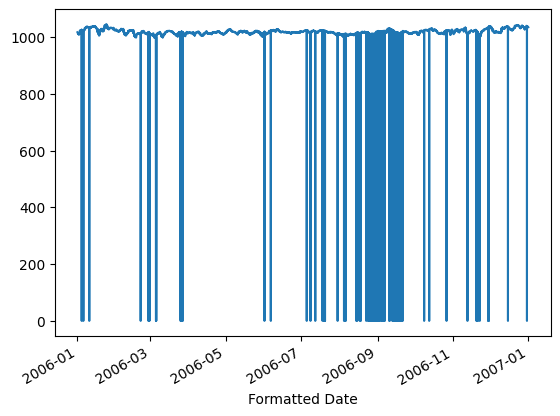

In [163]:
p_2006 = weather['Pressure (millibars)'].loc['2006']
p_2006.plot()

In [164]:
p_2006.isna().sum()

0

In [165]:
(p_2006==0).any() #The .any() method returns True if any of the values in the object are True, and False otherwise.

True

In [178]:
p_2006_new=p_2006.replace(0, np.nan)
p_2006_new[p_2006_new.isnull().values]

Formatted Date
2006-08-14 18:00:00   NaN
2006-08-15 10:00:00   NaN
2006-08-17 12:00:00   NaN
2006-08-18 09:00:00   NaN
2006-08-22 18:00:00   NaN
                       ..
2006-09-05 21:00:00   NaN
2006-09-06 06:00:00   NaN
2006-09-06 07:00:00   NaN
2006-09-06 18:00:00   NaN
2006-09-06 19:00:00   NaN
Name: Pressure (millibars), Length: 224, dtype: float64

In [180]:
p_2006_new.interpolate()[p_2006_new[p_2006_new.isnull().values].index]

Formatted Date
2006-08-14 18:00:00    1012.565
2006-08-15 10:00:00    1015.045
2006-08-17 12:00:00    1012.635
2006-08-18 09:00:00    1012.990
2006-08-22 18:00:00    1014.560
                         ...   
2006-09-05 21:00:00    1019.855
2006-09-06 06:00:00    1021.460
2006-09-06 07:00:00    1021.680
2006-09-06 18:00:00    1019.530
2006-09-06 19:00:00    1019.500
Name: Pressure (millibars), Length: 224, dtype: float64

<Axes: xlabel='Formatted Date'>

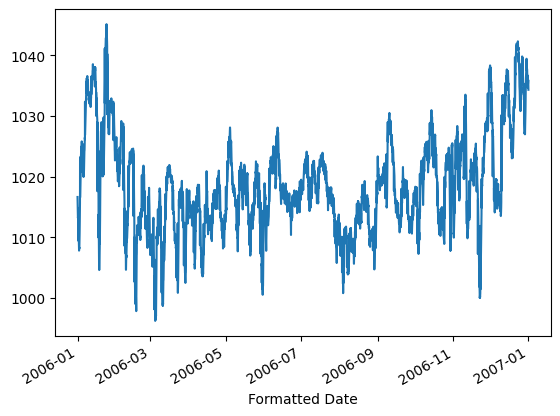

In [181]:
p_2006_new.interpolate().plot()

 ## Dealing with duplicates

In [183]:
df = pd.DataFrame({'a': [1, 2, 3, 2], 'b': [11, 2, 21, 2], 'c': [21, 2, 31, 2]})
df

,a,b,c
0,1,11,21
1,2,2,2
2,3,21,31
3,2,2,2


In [184]:
df.drop_duplicates()

,a,b,c
0,1,11,21
1,2,2,2
2,3,21,31


* Return DataFrame with duplicate rows removed